**1. ¿Qué algoritmo de Regresión Lineal se puede utilizar si se posee un *training set* de millones de características?**

Se puede emplear un Stochastic Gradient Descent o un Mini-Batch Gradient Descent para entrenar al modelo, es decir un SGDRegressor de Scikit-Learn.

**2. Supón que las características en tu *training set* tienen diferentes escalas, ¿qué algoritmos sufrirán por esto y cómo? ¿qué puedes hacer al respecto?**

Practicamente todos los algoritmos de regresión lineal regularizados además de los algoiritmos del Descenso del Gradiente sufrirán por no tener los datos escalados, lo que ocasionará que converjan más lento.
Lo que se debería hacer es escalar los datos empleando StandardScaler.

**3. ¿Puede el Descenso del Gradiente estancarse en un mínimo local cuando está entrenando un modelo de Regresión Logístico?**

No. La función de pérdida es convexa, así que el Gradiente del Descenso (o cualquier algoritmo de optimización) está garantizado a encontrar el mínimo global.

**4. ¿Todos los algoritmos de Descenso del Gradiente conducen al mismo modelo si se les deja correr el tiempo suficiente?**

No hay diferencia después del entrenamiento: todos algoritmos del Descenso del Gradiente terminarán en modelos muy similares y harán predicciones exactamente iguales, siempre y cuando se elijan las hiperparámetros correctos.

**5. Supón que empleas Batch Gradient Descent y graficas el error de validación en cada época. Si notas que el error de validación aumenta constantemente, ¿qué está ocurriendo? ¿Cómo puedes resolver esto?**

Está ocurriendo un sobreajuste, porque el modelo trabaja mejor con los datos de entrenamiento que con los de validación. Lo que se puede hacer es alimentar con más datos al set de entrenamiento hasta que el error de validación alcance al error de entrenamiento, o más interesante sería aplicar técnicas de regularización o emplear *early stopping*.

**6. Es una buena idea detener el Mini-Batch Gradient Descent inmediatamente cuando el error de validación aumenta?**

No. Puede que se haya quedado en un mínimo local. También se recomiendo emplear *early stopping* con *patience* (esperar un cierto número de épocas antes de detenerse).

**7. ¿Cuál algoritmo del Descenso del Gradiente alcanzará las proximidades de la solución óptima más rápidamente? ¿Cuál convergerá por completo? ¿Cómo hacer converger también a los demás?**

El mini-batch Gradient Descent alcanzará más rápidamente la solución óptima, si se emplean GPU's. El que convergerá por completo será Full Gradient Descent. Para hacer que converjan los demás (mini-batch stochastic) es necesario emplear un buen Learning Schedule.


**8. Supón que estás usando una Regresión Polinomial. Graficas las curvas de aprendizaje y notas que hay una gran brecha entre el error de entrenamiento y el de validación, ¿qué está ocurriendo? ¿Cuáles son tres soluciones a este problema?**

Probablemente se encuentre sobreajustado. Una solución es agregar más datos al set de entrenamiento, reducir la complejidad del modelo o regularizar el modelo (quitar grados de libertad)

**9. Supón que están empleando Ridge Regression y notas que el error de entrenamiento y de validación son casi iguales y muy altos, ¿Dirías que los modelos sufren de un bias alto o una varianza alta? ¿Deberías incrementar el hiperparámetro de regularización $\alpha$ o lo reducirías?**

El modelo tiene un bias alto, lo que quiere decir que esta subajustado. Se debería decrementar $\alpha$.

**10. ¿Por qué querrías utilizar**
* **Ridge Regression en lugar de una Regresión Lineal plana (es decir, sin una regularización)?**
Cuando el modelo está sobreajustado es buena idea utilizar un modelo regularizado que limite los grados de libertad que posee.
* **Lasso es lugar de Ridge Regression?**
Cuando se sospecha que hay varias características inservibles.
* **Elastic Net en lugar de Lasso?**
Lasso es errático cuando el número de características es mayor que el número de instancias de entrenamiento o cuando muchas características están estrechamente correlacionadas. En esos casos, es mejor emplear Elastic Net.

**11. Supón que quieres clasificar imágenes como exteriores/interiores y diurnas/nocturnas. ¿Deberías implementar dos clasificadores de regresión logística o un clasificador de regresión Softmax?**

El clasificador Softmax es Multiclase, no multisalida, lo que se debería emplear son dos clasificadores de regresión logística.

# 12. Implementa una Batch Gradient Descent con early stopping para una Regresión Softmax sin emplear Scikit-learn

In [1]:
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()
print(list(iris.keys()))
X = iris["data"][:, (2,3)] # petal length, petal width
y = iris["target"]

['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module']


Se requiere agregar el término de bias para cada isntancia ($x_0=1$):

In [2]:
X_with_bias = np.c_[np.ones([len(X), 1]), X]

In [3]:
np.random.seed(2042)

In [4]:
test_ratio=0.2
validation_ratio=0.2
total_size=len(X_with_bias)

test_size = int(total_size*test_ratio)
validation_size = int(total_size*validation_ratio)
train_size = total_size - test_size - validation_size

rnd_indices = np.random.permutation(total_size)

X_train = X_with_bias[rnd_indices[:train_size]]
y_train = y[rnd_indices[:train_size]]
X_valid = X_with_bias[rnd_indices[train_size:-test_size]]
y_valid = y[rnd_indices[train_size:-test_size]]
X_test = X_with_bias[rnd_indices[-test_size:]]
y_test = y[rnd_indices[-test_size:]]

In [5]:
def to_one_hot(y):
  n_classes = y.max() + 1
  m = len(y)
  Y_one_hot = np.zeros((m, n_classes))
  Y_one_hot[np.arange(m),y] = 1
  return Y_one_hot

In [6]:
y_train[:10]

array([0, 1, 2, 1, 1, 0, 1, 1, 1, 0])

In [7]:
to_one_hot(y_train[:10])

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [8]:
Y_train_one_hot = to_one_hot(y_train)
Y_valid_one_hot = to_one_hot(y_valid)
Y_test_one_hot = to_one_hot(y_test)

Implementar la función Softmax.

In [9]:
def softmax(logits):
  exps = np.exp(logits)
  exp_sums = np.sum(exps, axis=1, keepdims=True)
  return exps/exp_sums

In [10]:
n_inputs = X_train.shape[1] # == 3 (2 características más el bias)
n_outputs = len(np.unique(y_train)) # ==3 (3 clases de iris)

In [11]:
eta = 0.01
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7

Theta = np.random.rand(n_inputs, n_outputs)

for iteration in range(n_iterations):
  logits = X_train.dot(Theta)
  Y_proba = softmax(logits)
  if iteration % 500 == 0:
    loss = -np.mean(np.sum(Y_train_one_hot * np.log(Y_proba + epsilon), axis=1))
    print(iteration, loss)
  error = Y_proba - Y_train_one_hot
  gradients = 1/m * X_train.T.dot(error)
  Theta = Theta - eta * gradients

0 2.1041298095182546
500 0.7975963791730118
1000 0.6623252726598646
1500 0.5815322702225296
2000 0.5285580975272502
2500 0.4907949263916581
3000 0.4620865350818338
3500 0.4391923433913654
4000 0.4202717004630981
4500 0.40420680212026194
5000 0.3902793297020522


Parámetros del modelo

In [12]:
Theta

array([[ 3.52684124, -0.18458978, -2.48941342],
       [ 0.09459761,  1.08547944,  0.92677895],
       [-1.37121463, -0.01431783,  1.96615452]])

Predecir

In [13]:
logits = X_valid.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_valid)
accuracy_score

0.9666666666666667

Agreguemos una regularización *l2*.

In [14]:
eta = 0.1
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7
alpha = 0.1  # regularization hyperparameter

Theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)
    if iteration % 500 == 0:
        xentropy_loss = -np.mean(np.sum(Y_train_one_hot * np.log(Y_proba + epsilon), axis=1))
        l2_loss = 1/2 * np.sum(np.square(Theta[1:]))
        loss = xentropy_loss + alpha * l2_loss
        print(iteration, loss)
    error = Y_proba - Y_train_one_hot
    gradients = 1/m * X_train.T.dot(error) + np.r_[np.zeros([1, n_outputs]), alpha * Theta[1:]]
    Theta = Theta - eta * gradients

0 3.040740154171238
500 0.5373542238356596
1000 0.5048797659480837
1500 0.49514232526084495
2000 0.49147866212209823
2500 0.489976133442961
3000 0.48933255937994247
3500 0.4890499848980495
4000 0.4889240289982798
4500 0.4888673464408204
5000 0.4888416799787595


Dada la penalización *l2* agregada, la pérdida parecere más grande que antes, pero puede que este modelo tengo un mejor rendimiento?

In [15]:
logits = X_valid.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_valid)
accuracy_score

1.0

Genial. Accuracy perfecto!

Ahora agreguemos *early stopping*. Se requiere medir la pérdida en el set de validación en cada iteración y parar cuando el error empiece a incrementar.

In [16]:
eta = 0.1
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7
alpha = 0.1  # regularization hyperparameter
best_loss = np.infty

Theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)
    error = Y_proba - Y_train_one_hot
    gradients = 1/m * X_train.T.dot(error) + np.r_[np.zeros([1, n_outputs]), alpha * Theta[1:]]
    Theta = Theta - eta * gradients

    logits = X_valid.dot(Theta)
    Y_proba = softmax(logits)
    xentropy_loss = -np.mean(np.sum(Y_valid_one_hot * np.log(Y_proba + epsilon), axis=1))
    l2_loss = 1/2 * np.sum(np.square(Theta[1:]))
    loss = xentropy_loss + alpha * l2_loss
    if iteration % 500 == 0:
        print(iteration, loss)
    if loss < best_loss:
        best_loss = loss
    else:
        print(iteration - 1, best_loss)
        print(iteration, loss, "early stopping!")
        break

0 3.168908481405572
500 0.5553801459298814
1000 0.5387535197021774
1500 0.5341884333824545
2000 0.5328246505086449
2500 0.532545932727267
2560 0.532543867263595
2561 0.5325438677772627 early stopping!


Continúa siendo perfecto, pero más rápido!

In [17]:
logits = X_valid.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_valid)
accuracy_score

1.0

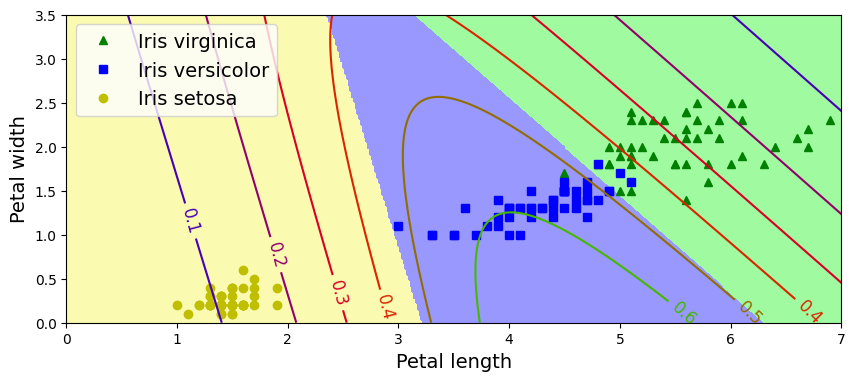

In [19]:
import matplotlib.pyplot as plt

x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
X_new_with_bias = np.c_[np.ones([len(X_new), 1]), X_new]

logits = X_new_with_bias.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

zz1 = Y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()

In [20]:
logits = X_test.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_test)
accuracy_score

0.9333333333333333